In [1]:
import tensorflow as tf
import keras as k
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
! python --version

Python 2.7.5


In [3]:
tf.__version__

'1.13.1'

In [4]:
k.__version__

'2.2.4'

In [5]:
read_all_imgs = []
for img_path in glob.glob("/data/hollatz/deep_learning/datasets/try2_gray_512_pgm/pgm/*.pgm"):
    img_frame = Image.open(img_path)
    split_path = img_path.split("/")
    split_format = split_path[-1].split(".")
    split_num = split_format[0].split("_")
    img_array = np.asarray(img_frame)
    img_array = img_array.reshape((img_array.shape[0], img_array.shape[1], 1))
    read_all_imgs.append((img_array, split_num[-1]))

In [7]:
from operator import itemgetter
sorted_all_imgs = sorted(read_all_imgs, key=itemgetter(1))

In [11]:
all_imgs = [ i for i,j in sorted_all_imgs]

In [12]:
all_imgs = np.array(all_imgs)

In [13]:
all_imgs.shape

(38742, 512, 512, 1)

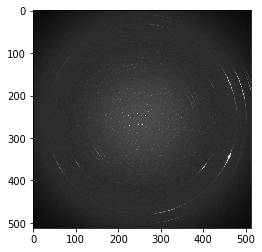

In [14]:
plt.imshow(all_imgs[0].reshape(all_imgs[0].shape[0], all_imgs[0].shape[1]), cmap='gray')

In [15]:
df_labels = pd.read_csv('/data/hollatz/deep_learning/datasets/try2_gray_512_pgm/multiclasses.txt', sep=' ', 
                        names=['blank', 'photo1', 'photo2', 'multilattice', 'ice', 'badice', 'mosaic1', 'mosaic2'])

In [16]:
df_labels.head()

,blank,photo1,photo2,multilattice,ice,badice,mosaic1,mosaic2
fake_00001.pgm,0,1,0,0,1,0,0.892528,0.000000
fake_00002.pgm,0,0,1,1,0,0,0.581729,0.568217
fake_00003.pgm,0,1,0,0,0,0,0.508285,0.000000
fake_00004.pgm,0,1,0,0,0,0,0.852589,0.000000
fake_00005.pgm,0,0,1,0,0,0,0.762097,0.000000


In [17]:
print "Number of images per category:"
print "blank: ", df_labels.blank[df_labels.blank == 1].count()
print "photo1: ", df_labels.photo1[df_labels.photo1 == 1].count()
print "photo2: ", df_labels.photo2[df_labels.photo2 == 1].count()
print "multilattice: ", df_labels.multilattice[df_labels.multilattice == 1].count()
print "ice: ", df_labels.ice[df_labels.ice == 1].count()
print "badice: ", df_labels.badice[df_labels.badice == 1].count()
print "mosaic1: ", df_labels.mosaic1[df_labels.mosaic1 > 0].count()
print "mosaic2: ", df_labels.mosaic1[df_labels.mosaic2 > 0].count()

Number of images per category:
blank:  114
photo1:  22722
photo2:  22796
multilattice:  13345
ice:  9099
badice:  4151
mosaic1:  38628
mosaic2:  13483


In [18]:
X_train, X_test, y_train, y_test = train_test_split(all_imgs, df_labels, test_size=0.33, random_state=42)

In [19]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [20]:
print("Training Images: ")
print(X_train.shape)
print(y_train.shape)
print("\n Validation Images: ")
print(X_val.shape)
print(y_val.shape)
print("\n Test Images: ")
print(X_test.shape)
print(y_test.shape)

Training Images: 
(25957, 512, 512, 1)
(25957, 8)

 Validation Images: 
(8565, 512, 512, 1)
(8565, 8)

 Test Images: 
(4220, 512, 512, 1)
(4220, 8)


In [21]:
y_train.head()

,blank,photo1,photo2,multilattice,ice,badice,mosaic1,mosaic2
fake_31986.pgm,0,1,0,1,1,1,0.710776,0.886752
fake_01706.pgm,0,1,0,0,0,0,0.770968,0.000000
fake_09435.pgm,0,0,1,0,0,0,0.512017,0.000000
fake_11359.pgm,0,1,0,0,0,0,0.810447,0.000000
fake_38172.pgm,0,1,1,1,0,0,0.588032,0.764495


In [22]:
print "Number of training images per category:"
print "blank: ", y_train.blank[y_train.blank == 1].count()
print "photo1: ", y_train.photo1[y_train.photo1 == 1].count()
print "photo2: ", y_train.photo2[y_train.photo2 == 1].count()
print "multilattice: ", y_train.multilattice[y_train.multilattice == 1].count()
print "ice: ", y_train.ice[y_train.ice == 1].count()
print "badice: ", y_train.badice[y_train.badice == 1].count()
print "mosaic1: ", y_train.mosaic1[y_train.mosaic1 > 0].count()
print "mosaic2: ", y_train.mosaic1[y_train.mosaic2 > 0].count()

Number of training images per category:
blank:  71
photo1:  15239
photo2:  15298
multilattice:  8974
ice:  6128
badice:  2753
mosaic1:  25886
mosaic2:  9066


In [23]:
print "Number of validation images per category:"
print "blank: ", y_val.blank[y_val.blank == 1].count()
print "photo1: ", y_val.photo1[y_val.photo1 == 1].count()
print "photo2: ", y_val.photo2[y_val.photo2 == 1].count()
print "multilattice: ", y_val.multilattice[y_val.multilattice == 1].count()
print "ice: ", y_val.ice[y_val.ice == 1].count()
print "badice: ", y_val.badice[y_val.badice == 1].count()
print "mosaic1: ", y_val.mosaic1[y_val.mosaic1 > 0].count()
print "mosaic2: ", y_val.mosaic1[y_val.mosaic2 > 0].count()

Number of validation images per category:
blank:  28
photo1:  5038
photo2:  5011
multilattice:  2967
ice:  1985
badice:  942
mosaic1:  8537
mosaic2:  2996


In [24]:
print "Number of test images per category:"
print "blank: ", y_test.blank[y_test.blank == 1].count()
print "photo1: ", y_test.photo1[y_test.photo1 == 1].count()
print "photo2: ", y_test.photo2[y_test.photo2 == 1].count()
print "multilattice: ", y_test.multilattice[y_test.multilattice == 1].count()
print "ice: ", y_test.ice[y_test.ice == 1].count()
print "badice: ", y_test.badice[y_test.badice == 1].count()
print "mosaic1: ", y_test.mosaic1[y_test.mosaic1 > 0].count()
print "mosaic2: ", y_test.mosaic1[y_test.mosaic2 > 0].count()

Number of test images per category:
blank:  15
photo1:  2445
photo2:  2487
multilattice:  1404
ice:  986
badice:  456
mosaic1:  4205
mosaic2:  1421


In [26]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=360,
    rescale=1./255)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [39]:
input_X = k.layers.Input(shape=(512, 512, 1), name="input")

base_model = k.applications.ResNet50(include_top=False, weights = None, input_shape=(512, 512, 1))(input_X)
flatten = k.layers.Flatten()(base_model)
logits_blank = k.layers.Dense(units=1, activation='sigmoid', name="blank_logits")(flatten )
logits_photo1 = k.layers.Dense(units=1, activation='sigmoid', name="photo1_logits")(flatten )
logits_photo2 = k.layers.Dense(units=1, activation='sigmoid', name="photo2_logits")(flatten )
logits_multilattice = k.layers.Dense(units=1, activation='sigmoid', name="multilattice_logits")(flatten )
logits_ice = k.layers.Dense(units=1, activation='sigmoid', name="ice_logits")(flatten )
logits_badice = k.layers.Dense(units=1, activation='sigmoid', name="badice_logits")(flatten )
logits_mosaic1 = k.layers.Dense(units=1, activation=None, name="mosaic1_logits")(flatten )
logits_mosaic2 = k.layers.Dense(units=1, activation=None, name="mosaic2_logits")(flatten )

model_ResNet50 = k.Model(inputs=input_X, outputs=[logits_blank, logits_photo1, logits_photo2, logits_multilattice,\
                                              logits_ice, logits_badice, logits_mosaic1, logits_mosaic2])
# modelVGG16 = k.Model(inputs=input_X, outputs=logits)

In [40]:
model_ResNet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
resnet50 (Model)                (None, 16, 16, 2048) 23581440    input[0][0]                      
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 524288)       0           resnet50[1][0]                   
__________________________________________________________________________________________________
blank_logits (Dense)            (None, 1)            524289      flatten_3[0][0]                  
__________________________________________________________________________________________________
photo1_log

In [41]:
model_ResNet50.compile(loss=['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', \
                         'binary_crossentropy', 'binary_crossentropy', 'mse', 'mse'],
                   optimizer=k.optimizers.Adam(0.0001))

In [43]:
epochs = 10
batchsize = 32

def multiple_outputs(generator, X, y, batch_size):
    gen = generator.flow(X, y, batch_size=batchsize)
    while True:
        gnext = gen.next()
        ys_blank = [label[0] for label in gnext[1]]
        ys_photo1 = np.array([label[1] for label in gnext[1]])
        ys_photo2 = np.array([label[2] for label in gnext[1]])
        ys_multilattice = np.array([label[3] for label in gnext[1]])
        ys_ice = np.array([label[4] for label in gnext[1]])
        ys_badice = np.array([label[5] for label in gnext[1]])
        ys_mosaic1 = np.array([label[6] for label in gnext[1]])
        ys_mosaic2 = np.array([label[7] for label in gnext[1]])
        yield gnext[0], [ys_blank, ys_photo1, ys_photo2, ys_multilattice, ys_ice, ys_badice, ys_mosaic1, ys_mosaic2]

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

train_gen = multiple_outputs(train_datagen, X_train, y_train, batchsize)
val_gen = multiple_outputs(val_datagen, X_val, y_val, batchsize)

In [44]:
# data is randomly shuffled at each epoch
# history object is a record of training and validation loss values and metrics values at successive epochs
history = model_ResNet50.fit_generator(train_gen, 
                    validation_data=val_gen,
                    steps_per_epoch=len(X_train) / batchsize,
                    validation_steps=len(X_val) / batchsize,
                    shuffle=True,
                    callbacks=[callback],
                    epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
811/811 [==============================] - 741s 914ms/step - loss: 45.2800 - blank_logits_loss: 0.0474 - photo1_logits_loss: 6.5750 - photo2_logits_loss: 6.5407 - multilattice_logits_loss: 5.5681 - ice_logits_loss: 3.8052 - badice_logits_loss: 1.7129 - mosaic1_logits_loss: 12.9659 - mosaic2_logits_loss: 8.0649 - val_loss: 36.8588 - val_blank_logits_loss: 0.0528 - val_photo1_logits_loss: 6.5699 - val_photo2_logits_loss: 6.6109 - val_multilattice_logits_loss: 5.5783 - val_ice_logits_loss: 3.7371 - val_badice_logits_loss: 1.7714 - val_mosaic1_logits_loss: 3.1225 - val_mosaic2_logits_loss: 9.4158
Epoch 2/10
811/811 [==============================] - 582s 718ms/step - loss: 26.6351 - blank_logits_loss: 0.0441 - photo1_logits_loss: 6.5873 - photo2_logits_loss: 6.5459 - multilattice_logits_loss: 5.5682 - ice_logits_loss: 3.8062 - badice_logits_loss: 1.7086 - mosaic1_logits_loss: 0.8275 - mosaic2_logits_loss: 1.5473 - val_loss: 43.4651

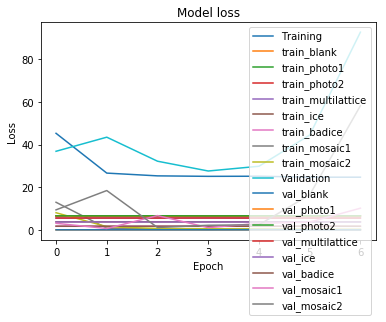

In [45]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['blank_logits_loss'])
plt.plot(history.history['photo1_logits_loss'])
plt.plot(history.history['photo2_logits_loss'])
plt.plot(history.history['multilattice_logits_loss'])
plt.plot(history.history['ice_logits_loss'])
plt.plot(history.history['badice_logits_loss'])
plt.plot(history.history['mosaic1_logits_loss'])
plt.plot(history.history['mosaic2_logits_loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_blank_logits_loss'])
plt.plot(history.history['val_photo1_logits_loss'])
plt.plot(history.history['val_photo2_logits_loss'])
plt.plot(history.history['val_multilattice_logits_loss'])
plt.plot(history.history['val_ice_logits_loss'])
plt.plot(history.history['val_badice_logits_loss'])
plt.plot(history.history['val_mosaic1_logits_loss'])
plt.plot(history.history['val_mosaic2_logits_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','train_blank','train_photo1', 'train_photo2', 'train_multilattice', 'train_ice', 'train_badice', \
            'train_mosaic1', 'train_mosaic2', 'Validation', 'val_blank','val_photo1', 'val_photo2', 'val_multilattice', \
            'val_ice', 'val_badice', 'val_mosaic1', 'val_mosaic2'], loc='upper right')
plt.show()

In [46]:
model_ResNet50.save('/mnt/home1/hollatz/projects/deep_learning/development/CSCL4622/ResNet50_lr0001_bs32_pgm_512.h5')